<a href="https://colab.research.google.com/github/hyhyhy04/colabpython/blob/main/%ED%8C%8C%EB%8D%B0%EB%B6%84%ED%8C%80%ED%94%8C%EC%88%98%EC%A0%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install koreanize-matplotlib
import koreanize_matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 57.5 MB/s eta 0:00:00


In [ ]:
# Colab에서 한글 폰트 설정용
!apt-get update -qq
!apt-get install -y fonts-nanum

import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
plt.rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] = False

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 93 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 0s (43.2 MB/s)
Selecting previously unselected package fonts-nanum.
(Reading database ... 126102 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving culture_participation.csv to culture_participation.csv
Saving life_satisfaction.csv to life_satisfaction.csv


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 파일 불러오기
df_culture = pd.read_csv('culture_participation.csv', encoding='cp949')
df_life = pd.read_csv('life_satisfaction.csv', encoding='cp949')

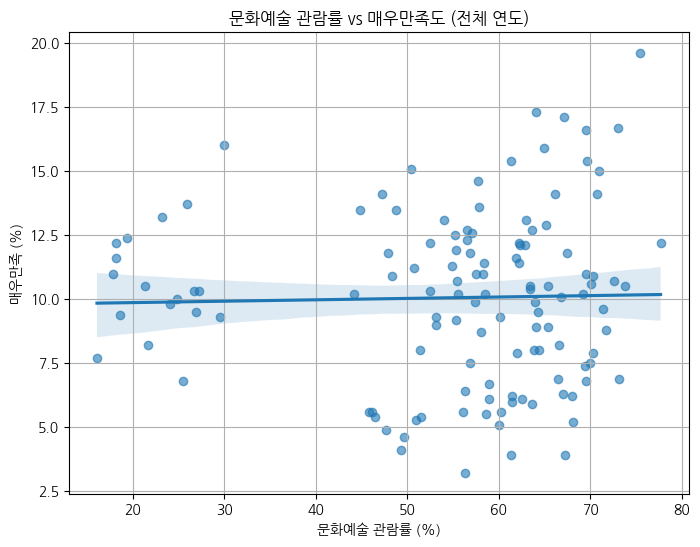

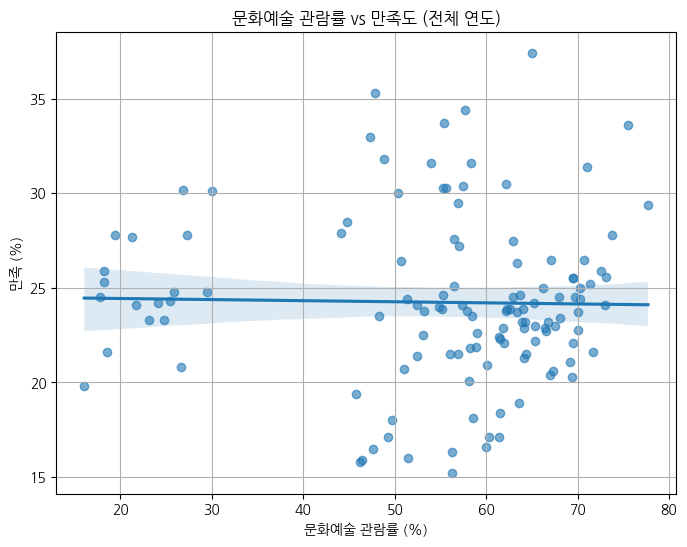

In [ ]:
# 만족도 전처리
df_life = df_life.rename(columns={'행정구역별(1)': '지역'})
df_life = df_life[df_life['지역'] != '행정구역별(1)']  # 첫 행 제거

years = ['2011', '2013', '2015', '2017', '2019', '2021', '2023']
sum_cols = years
very_cols = [f"{year}.1" for year in years]

df_sum = df_life[['지역'] + sum_cols].copy()
df_sum = df_sum.melt(id_vars='지역', var_name='년도', value_name='계')

df_very = df_life[['지역'] + very_cols].copy()
df_very.columns = ['지역'] + years
df_very = df_very.melt(id_vars='지역', var_name='년도', value_name='매우만족')

satisfied_cols = [f"{year}.2" for year in years]

df_satis = df_life[['지역'] + satisfied_cols].copy()
df_satis.columns = ['지역'] + years
df_satis = df_satis.melt(id_vars='지역', var_name='년도', value_name='만족')

df_life_long = pd.merge(df_sum, df_very, on=['지역', '년도'])
df_life_long = pd.merge(df_life_long, df_satis, on=['지역', '년도'])


#  문화관람 전처리
df_culture = df_culture.rename(columns={'행정구역별(1)': '지역'})
df_culture = df_culture[df_culture['지역'] != '행정구역별(1)']

df_culture_melted = df_culture.melt(id_vars='지역', var_name='년도', value_name='문화예술관람률')


df_culture_melted['년도'] = df_culture_melted['년도'].astype(str)
df_life_long['년도'] = df_life_long['년도'].astype(str)

df_merged = pd.merge(df_life_long, df_culture_melted, on=['지역', '년도'])

for col in ['계', '매우만족', '만족', '문화예술관람률']:
    df_merged[col] = pd.to_numeric(df_merged[col], errors='coerce')

def plot_relation(x, y, title):
    plt.figure(figsize=(8,6))
    sns.regplot(data=df_merged, x=x, y=y, scatter_kws={'alpha':0.6})
    plt.title(title)
    plt.xlabel('문화예술 관람률 (%)')
    plt.ylabel(f'{y} (%)')
    plt.grid(True)
    plt.show()

# 시각화
plot_relation('문화예술관람률', '매우만족', '문화예술 관람률 vs 매우만족도 (전체 연도)')
plot_relation('문화예술관람률', '만족', '문화예술 관람률 vs 만족도 (전체 연도)')

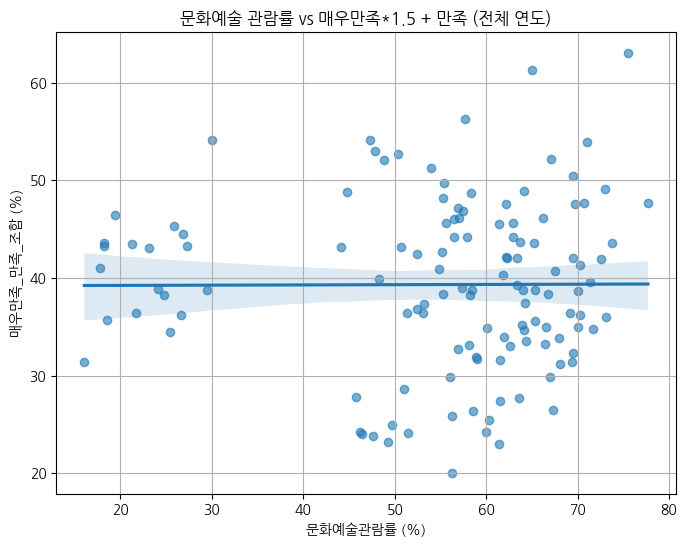

In [ ]:
# 연도 설정
years = ['2011', '2013', '2015', '2017', '2019', '2021', '2023']

sum_cols = years
very_satisfied_cols = [f"{year}.1" for year in years]
satisfied_cols = [f"{year}.2" for year in years]

df_sum = df_life[['지역'] + sum_cols].copy()
df_sum = df_sum.melt(id_vars='지역', var_name='년도', value_name='계')

df_very = df_life[['지역'] + very_satisfied_cols].copy()
df_very.columns = ['지역'] + years
df_very = df_very.melt(id_vars='지역', var_name='년도', value_name='매우만족')

df_satis = df_life[['지역'] + satisfied_cols].copy()
df_satis.columns = ['지역'] + years
df_satis = df_satis.melt(id_vars='지역', var_name='년도', value_name='만족')


df_life_long = df_sum.merge(df_very, on=['지역', '년도']).merge(df_satis, on=['지역', '년도'])


df_culture = df_culture.rename(columns={'행정구역별(1)': '지역'})
df_culture = df_culture[df_culture['지역'] != '행정구역별(1)']
df_culture_melted = df_culture.melt(id_vars='지역', var_name='년도', value_name='문화예술관람률')


df_culture_melted['년도'] = df_culture_melted['년도'].astype(str)
df_life_long['년도'] = df_life_long['년도'].astype(str)


df_merged = pd.merge(df_life_long, df_culture_melted, on=['지역', '년도'])


for col in ['계', '매우만족', '만족', '문화예술관람률']:
    df_merged[col] = pd.to_numeric(df_merged[col], errors='coerce')


df_merged['매우만족_만족_조합'] = df_merged['매우만족'] * 1.5 + df_merged['만족']


def plot_relation(x, y, title):
    plt.figure(figsize=(8,6))
    sns.regplot(data=df_merged, x=x, y=y, scatter_kws={'alpha':0.6})
    plt.title(title)
    plt.xlabel(f'{x} (%)')
    plt.ylabel(f'{y} (%)')
    plt.grid(True)
    plt.show()


plot_relation('문화예술관람률', '매우만족_만족_조합', '문화예술 관람률 vs 매우만족*1.5 + 만족 (전체 연도)')
